In [32]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import teamgamelog, leaguedashteamstats
import pandas as pd 
import numpy as np



In [33]:
import pandas as pd

teams_data = pd.read_excel("Net Rating Data.xlsx")

def get_team_netrating_for_season(team_name, season_start):
    team_season_data = teams_data[(teams_data['team_name'] == team_name) & (teams_data['season_start'] == season_start)]
    
    if team_season_data.empty:
        return None
    
    team_netrating = team_season_data['NET_RATING'].mean()
    return team_netrating

def get_team_wins_for_season(team_name, season_start):
    team_season_data = teams_data[(teams_data['team_name'] == team_name) & (teams_data['season_start'] == season_start)]
    
    if team_season_data.empty:
        return None
    team_wins = team_season_data['WINS'].sum()
    return team_wins

def get_team_netrating_and_wins(team_name, season_start):
    team_netrating = get_team_netrating_for_season(team_name, season_start)
    team_wins = get_team_wins_for_season(team_name, season_start)
    
    return team_netrating, team_wins

def get_all_teams_netratings_and_wins(season_start):
    season_data = teams_data[teams_data['season_start'] == season_start]
    teams = season_data['team_name'].unique()
    
    netrating_list = []
    team_wins_list = []
    for team_name in teams:
        team_netrating = get_team_netrating_for_season(team_name, season_start)
        team_wins = get_team_wins_for_season(team_name, season_start)
        
        netrating_list.append(team_netrating)
        team_wins_list.append(team_wins)
    
    return netrating_list, team_wins_list


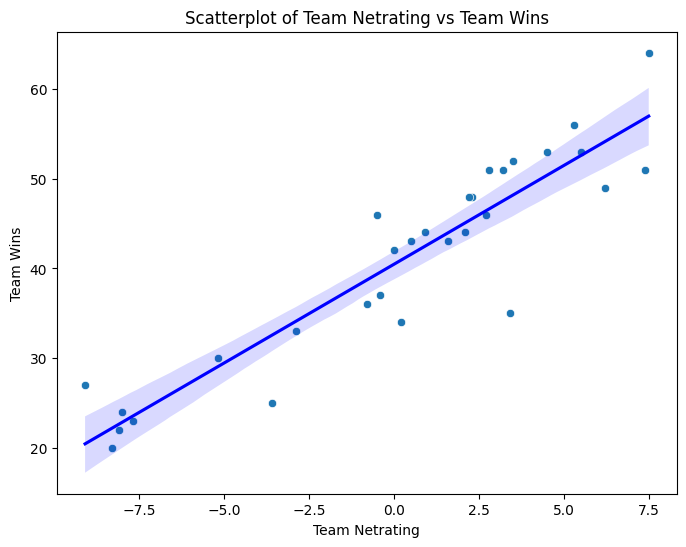

In [34]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

netrating_list = [1.6,7.4,0.9,0.5,-0.5,2.1,3.5,2.3,-7.7,5.5,-8.3,-3.6,0,-2.9,5.3,4.5,3.2,2.7,-0.8,-0.4,-8,-8.1,2.8,7.5,-9.1,-5.2,0.2,2.2,6.2
,3.4]  
team_wins_list = [43,51,44,43,46,44,52,48,23,53,20,25,42,33,56,53,51,46,36,37,24,22,51,64,27,30,34,48,49,35]   

data = {'Netrating': netrating_list, 'Team Wins': team_wins_list}
player_team_data = pd.DataFrame(data)

plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='Netrating', y='Team Wins', data=player_team_data)

sns.regplot(x='Netrating', y='Team Wins', data=player_team_data, scatter=False, color='blue')

plt.title("Scatterplot of Team Netrating vs Team Wins")
plt.xlabel("Team Netrating")
plt.ylabel("Team Wins")

plt.show()